In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v0')

[2017-01-28 18:20:51,148] Making new env: FrozenLake-v0


In [98]:
episodes = 500
alpha = 0.8
gamma = 0.99

In [99]:
Q = np.ones((env.nS,env.nA)) / 100
R = np.zeros(episodes)

In [100]:
def selectAction(state):
    return np.argmax(Q[state,:])

In [101]:
for i in range(episodes):
    
    state = env.reset()

    firstAction = True
    finished = False
    while(not finished):

        # Action Selection
        if firstAction:
            action = selectAction(state)
            firstAction = False
        else:
            action = nextAction

        # Interaction with Environment
        nextState, reward, finished, _ = env.step(action)

        # Update Value Function
        if not finished:
            nextAction = selectAction(nextState)
            Q[state,action] +=  alpha * ( reward + gamma * Q[nextState,nextAction]  - Q[state,action])
        else:
            Q[state,action] +=  alpha * ( reward - Q[state,action] )
        
        # Update State/Action/Reward
        state = nextState
        action = nextAction
        R[i] += reward
        

Learned after 116 iterations


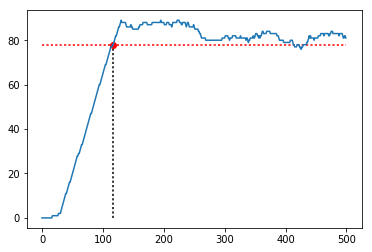

In [106]:
learning_goal = 78
average_window = 100
learned = False

rewards_moving_average = []
for index in range(episodes):
    
    if index >= average_window:
        start = index-average_window
    else:
        start = 0
    
    performance = sum(R[start:index])
    rewards_moving_average.append(performance)
    
    if not learned and performance >= learning_goal:
        learned = True
        plt.plot([index],[performance],'or',lw=5)
        plt.vlines(index,0,performance,linestyle='dotted')
        print('Learned after {} iterations'.format(index))
        
plt.plot(rewards_moving_average)

plt.hlines(learning_goal, 0, episodes,linestyle='dotted',color='red')
plt.show()